In [3]:
import os
path_Data = "E:\\MSE23-PPR501\\Assignment2\\Data\\BigMartSales Prediction\\"
check_dir = os.path.isdir(path_Data)

check_file_train = os.path.isfile(path_Data + "Train.csv")

check_file_test = os.path.isfile(path_Data + "Test.csv")

print("The path and file are valid or not :",
      check_dir, check_file_train, check_file_test)


The path and file are valid or not : True True True


In [ ]:
import pandas as pd

train = pd.read_csv(path_Data + "Train.csv")
test = pd.read_csv(path_Data + "Test.csv")

print(train.shape, test.shape)
print(train.index)
print(train.columns)


(8523, 12) (5681, 11)
RangeIndex(start=0, stop=8523, step=1)
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [4]:
import numpy as np

display(train.head())
print(np.unique(train['Item_Fat_Content']))
print(np.unique(test['Item_Type']))
print(train['Outlet_Size'].unique())
print(np.unique(train['Outlet_Location_Type']))
print(np.unique(train['Outlet_Type']))


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


['LF' 'Low Fat' 'Regular' 'low fat' 'reg']
['Baking Goods' 'Breads' 'Breakfast' 'Canned' 'Dairy' 'Frozen Foods'
 'Fruits and Vegetables' 'Hard Drinks' 'Health and Hygiene' 'Household'
 'Meat' 'Others' 'Seafood' 'Snack Foods' 'Soft Drinks' 'Starchy Foods']
['Medium' nan 'High' 'Small']
['Tier 1' 'Tier 2' 'Tier 3']
['Grocery Store' 'Supermarket Type1' 'Supermarket Type2'
 'Supermarket Type3']


In [5]:
s = train['Item_Fat_Content'].value_counts()
StatsDF = pd.DataFrame({'Item_Fat_Content': s.index, 'Frequency': s.values})
display(StatsDF)


,Item_Fat_Content,Frequency
0,Low Fat,5089
1,Regular,2889
2,LF,316
3,reg,117
4,low fat,112


In [6]:
train.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Assignment: Make Predictions for test.csv, Calculate the Mean Squared Error (MSE), and Find the Best Value for n_neighbors.


In [7]:
train.describe(include=object)


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [8]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [10]:
train.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
test.isnull().sum()


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [11]:
train.Item_Weight = train.Item_Weight.fillna(train.Item_Weight.mean())

train.Outlet_Size = train.Outlet_Size.fillna(train.Outlet_Size.mode().iloc[0])

test.Item_Weight = test.Item_Weight.fillna(test.Item_Weight.mean())

test.Outlet_Size = test.Outlet_Size.fillna(test.Outlet_Size.mode().iloc[0])


In [12]:
print(train.isnull().sum())


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [13]:
print(test.isnull().sum())


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


In [14]:
train.Item_Fat_Content.value_counts()


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [15]:
test.Item_Fat_Content.value_counts()


Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64

In [ ]:
train.Item_Fat_Content = train.Item_Fat_Content.str.replace(
    'low fat', 'Low Fat')

train.Item_Fat_Content = train.Item_Fat_Content.str.replace('LF', 'Low Fat')

train.Item_Fat_Content = train.Item_Fat_Content.str.replace('reg', 'Regular')

test.Item_Fat_Content = test.Item_Fat_Content.str.replace('low fat', 'Low Fat')

test.Item_Fat_Content = test.Item_Fat_Content.str.replace('LF', 'Low Fat')

test.Item_Fat_Content = test.Item_Fat_Content.str.replace('reg', 'Regular')


0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64


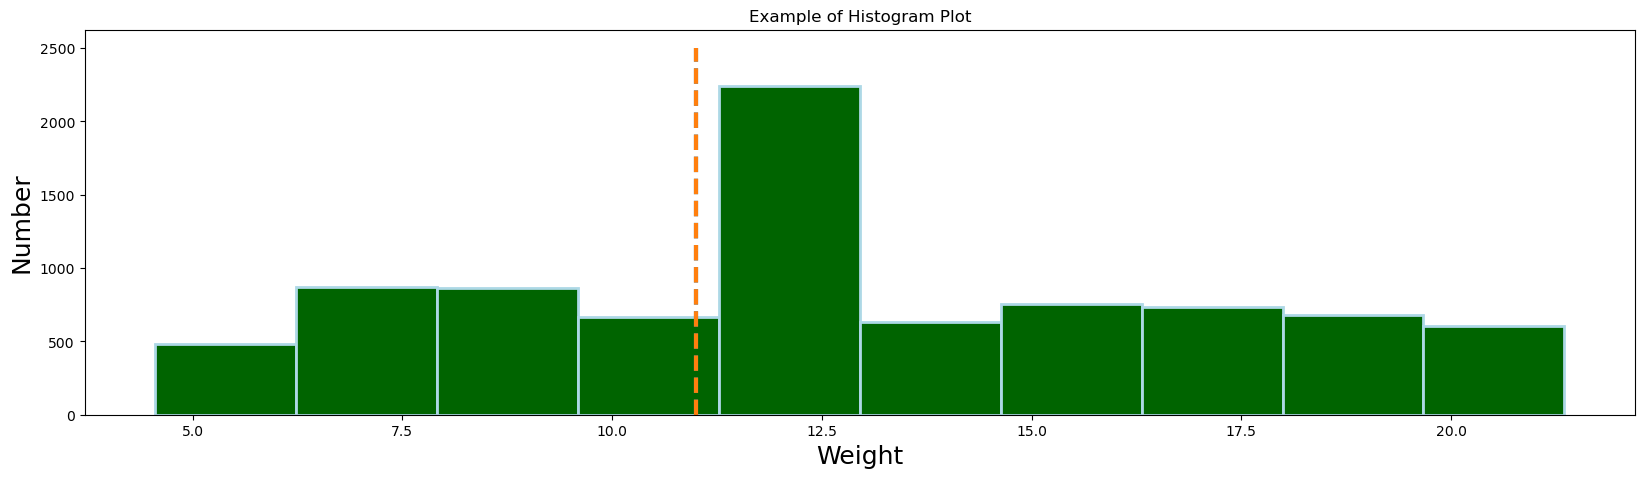

In [18]:
import matplotlib.pyplot as plt

print(train.Item_Weight)
train.Item_Weight.plot(kind='hist', edgecolor='lightblue',
                       lw=2, color='darkgreen', figsize=(20, 5))
plt.plot([11, 11], [0, 2500], ls='--', lw=3)
plt.plot([11, 11], [0, 2500], ls='--', lw=3)

plt.xlabel('Weight', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.title('Example of Histogram Plot')

plt.show()


0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_3780\2990200752.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Item_Outlet_Sales"], hist_kws=dict(


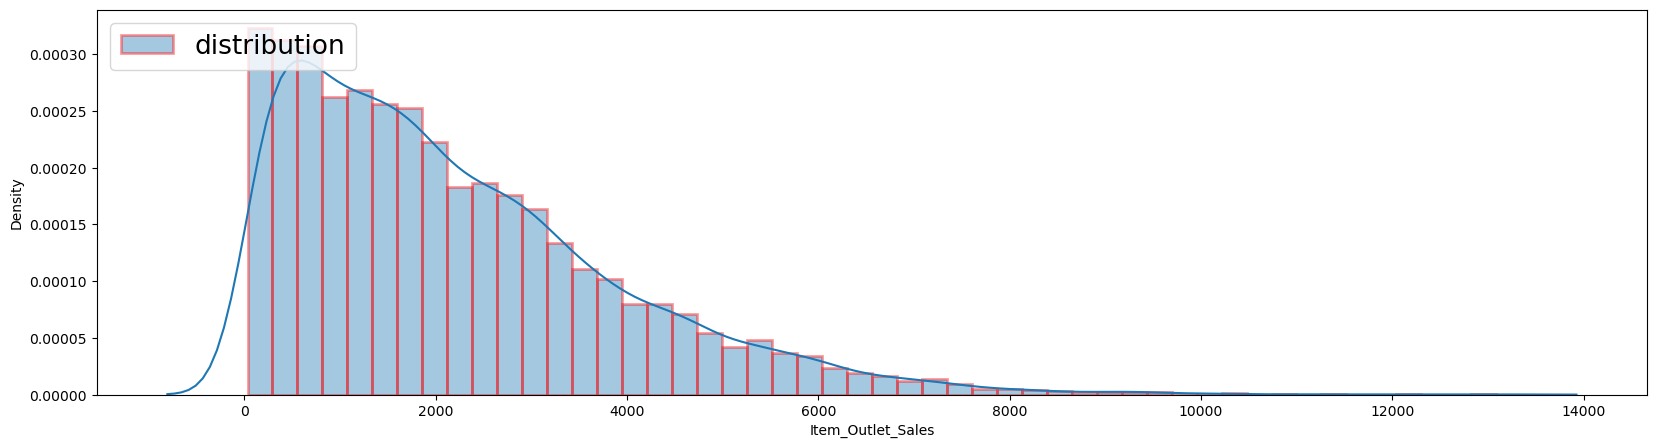

In [21]:
import seaborn as sns
plt.figure(figsize=(20, 5))
print(train['Item_Outlet_Sales'])
sns.distplot(train["Item_Outlet_Sales"], hist_kws=dict(
    edgecolor="red", linewidth=2, label='distribution'))
plt.legend(loc=2, fontsize=19)
plt.savefig("Fig.png", dpi=600)


<Axes: xlabel='count', ylabel='Item_Type'>

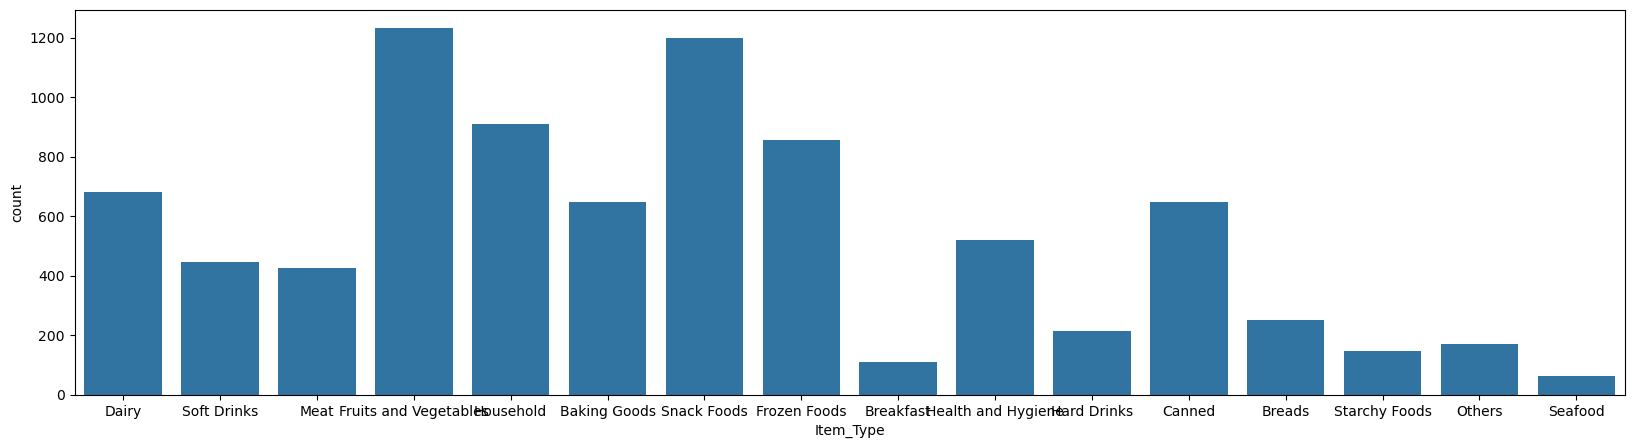

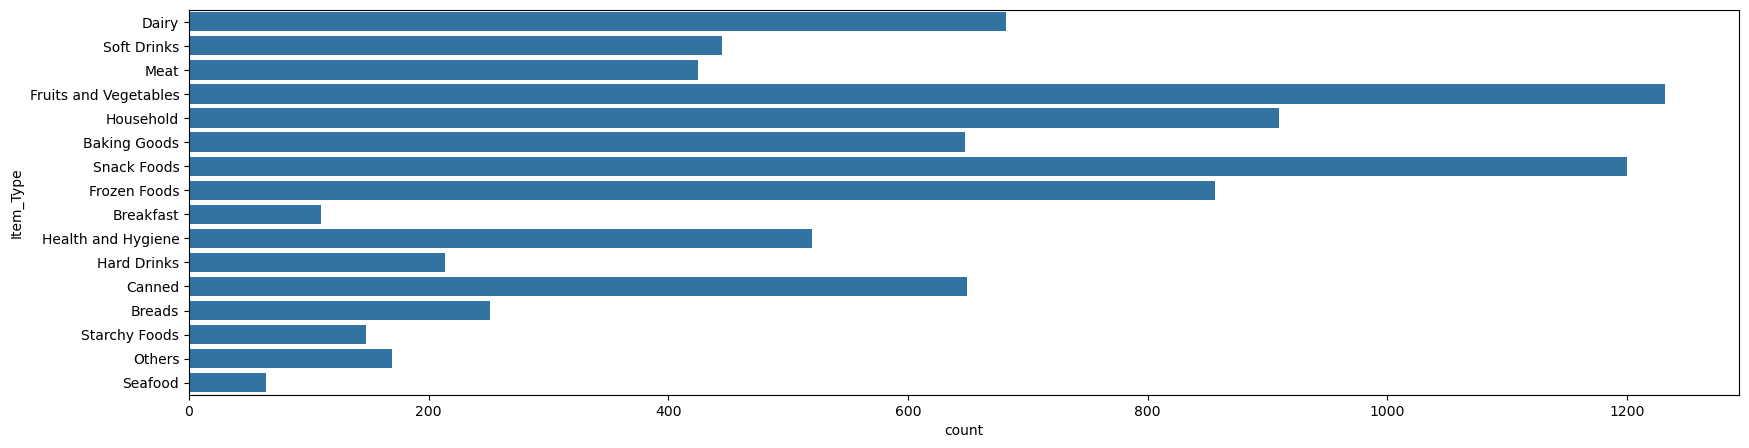

In [ ]:
import seaborn as sns
plt.figure(figsize=(20, 5))
sns.countplot(x='Item_Type', data=train)
plt.figure(figsize=(20, 5))
sns.countplot(y='Item_Type', data=train)


<Axes: xlabel='Item_Fat_Content', ylabel='count'>

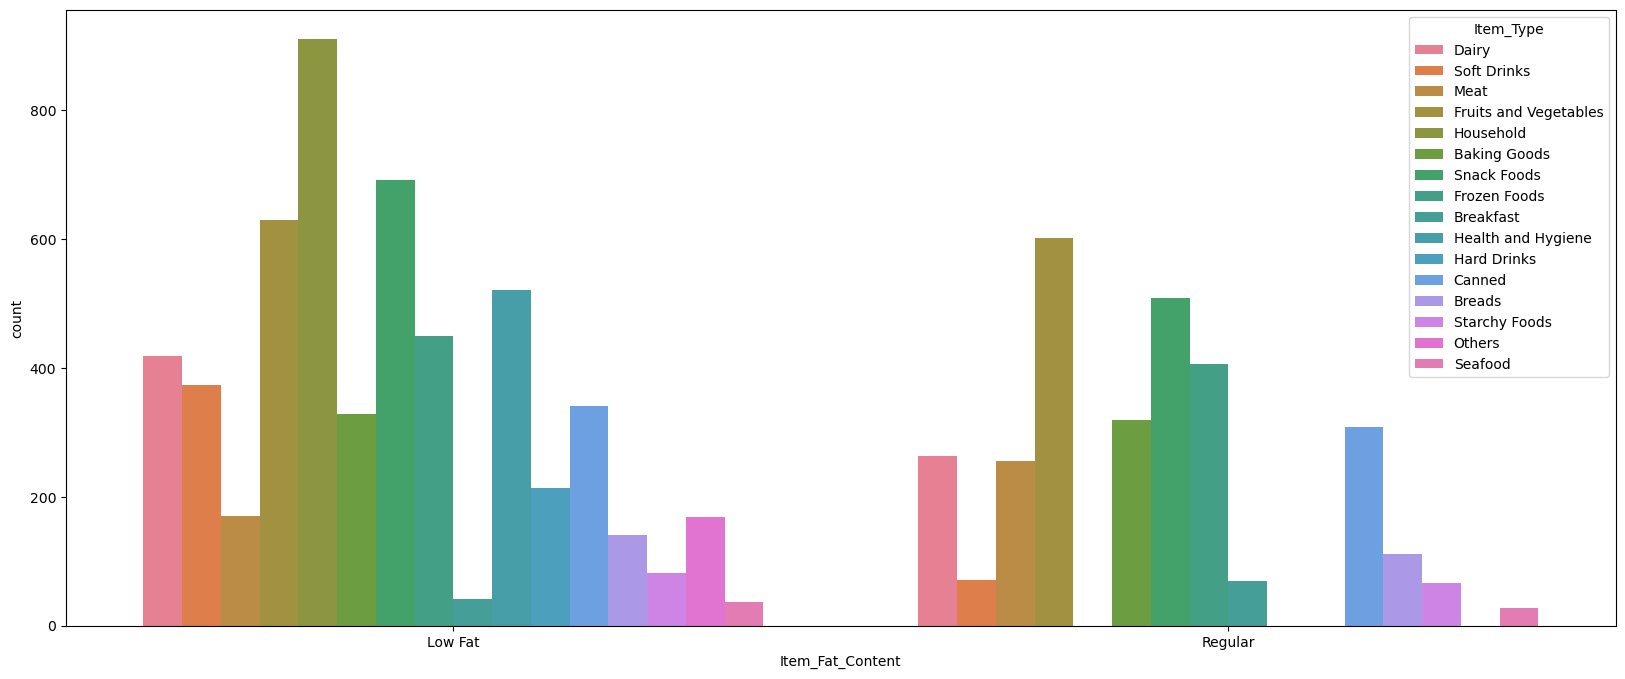

In [24]:
plt.figure(figsize=(20, 8))
sns.countplot(x='Item_Fat_Content', hue='Item_Type', data=train)


In [25]:
train.isna().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<Axes: >

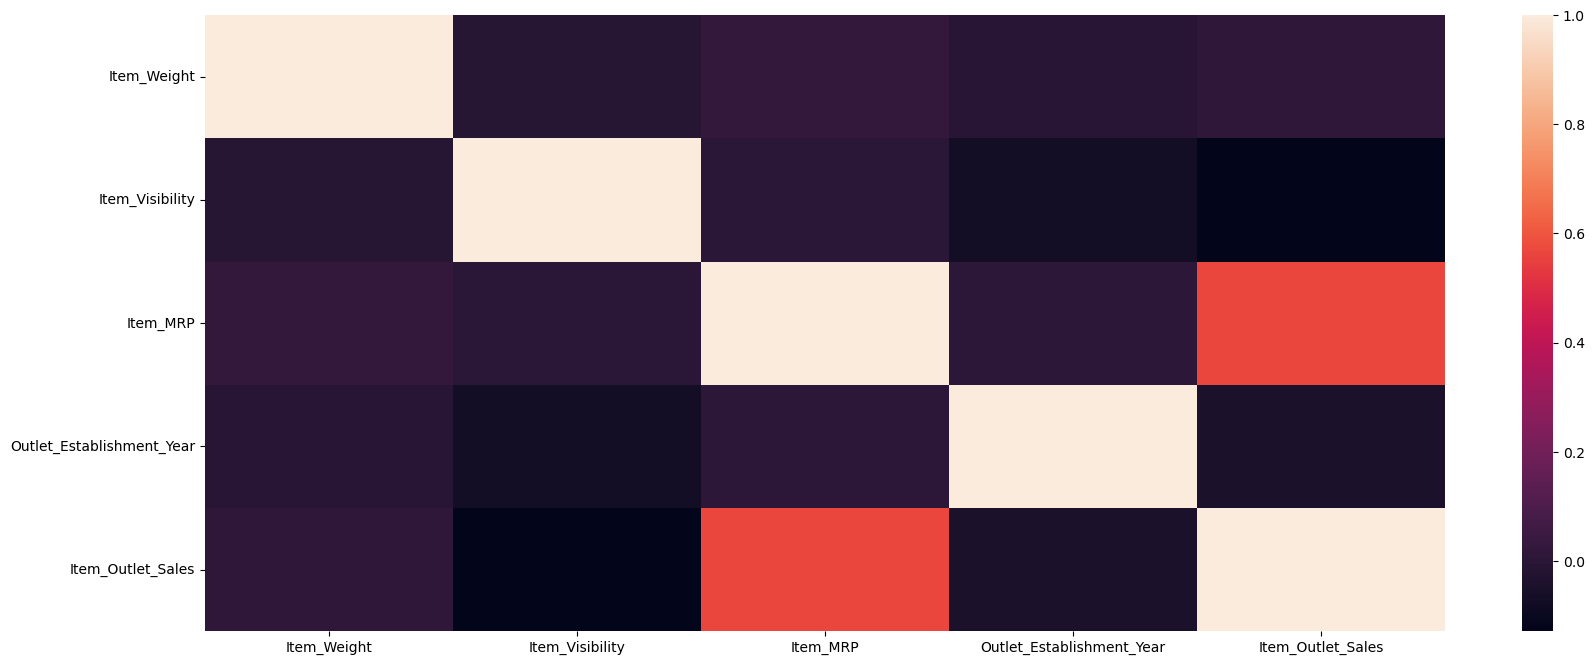

In [ ]:
train = train.select_dtypes(include=[float, int])
plt.figure(figsize=(20, 8))
sns.heatmap(train.corr(),)


In [28]:
train


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [2]:
%pip install scikit-learn



Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\admin\appdata\local\programs\python\python313\lib\site-packages\bs4-0.0.2-py3.13.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\admin\appdata\local\programs\python\python313\lib\site-packages\lxml-5.3.0-py3.13-win-amd64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\admin\appdata\local\programs\python\python313\lib\site-packages\narwhals-1.19.0-py3.13.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\admin\a

In [3]:
import sklearn
print(sklearn.__version__)


1.6.0


In [5]:
# Jupyter notebook
import os
path_Data = 'D:\\Learn\\MSE23-PPR501\\Assignment2\\Data\\BigMartSales Prediction\\'
checkPath = os.path.isdir(path_Data)
checkFileTrain = os.path.isfile(path_Data + "Train.csv")
checkFileTest = os.path.isfile(path_Data + "Test.csv")
print("The path and file are valid or not :",
      checkPath, checkFileTrain, checkFileTest)


The path and file are valid or not : True True True


In [6]:
import pandas as pd
train = pd.read_csv(path_Data + "Train.csv")
test = pd.read_csv(path_Data + "Test.csv")


In [7]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
test.isna().sum()


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
test.Item_Weight = test.Item_Weight.fillna(test.Item_Weight.mean())
test.Outlet_Size = test.Outlet_Size.fillna(test.Outlet_Size.mode().iloc[0])
test.Item_Fat_Content = test.Item_Fat_Content.str.replace('low fat', 'Low Fat')
test.Item_Fat_Content = test.Item_Fat_Content.str.replace('LF', 'Low Fat')
test.Item_Fat_Content = test.Item_Fat_Content.str.replace('reg', 'Regular')


In [10]:
test.isna().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [11]:
x_test = test[["Item_Weight", "Item_Visibility"]]
y_test = test["Item_MRP"]


In [17]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

# Bước 1: Huấn luyện mô hình KNN
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(x_test, y_test)

# Bước 2: Dự đoán giá trị từ x_test
y_pred = neigh.predict(x_test)

# Bước 3: Sao chép DataFrame train vào PredictDF
PredictDF = test.copy()

# Bước 4: Thêm cột 'Item_MRP_Predict' vào PredictDF
PredictDF["Item_MRP_Predict"] = y_pred

# Bước 5: Lưu kết quả vào tệp CSV mới nếu cần
PredictDF.to_csv(
    'D:\\Learn\\MSE23-PPR501\\Assignment2\\Work\\2B\\test_with_predictions.csv', index=False)

# In kết quả
print("Dự đoán đã được thêm vào cột 'Item_MRP_Predict' và lưu vào test_with_predictions.csv")


Dự đoán đã được thêm vào cột 'Item_MRP_Predict' và lưu vào test_with_predictions.csv


In [18]:
testPridict = pd.read_csv(
    'D:\\Learn\\MSE23-PPR501\\Assignment2\\Work\\2B\\test_with_predictions.csv')
x_test_predict = testPridict[["Item_Weight", "Item_Visibility", "Item_MRP"]]
y_test_predict = testPridict["Item_MRP_Predict"]


In [19]:
from sklearn.neighbors import KNeighborsRegressor

# Sử dụng chính dữ liệu x_test_predict làm tập huấn luyện (ví dụ cho việc huấn luyện mô hình)
knn = KNeighborsRegressor(n_neighbors=5)  # Chọn số láng giềng ban đầu là 5
knn.fit(x_test_predict, y_test_predict)  # Huấn luyện mô hình

# Dự đoán giá trị trên x_test_predict
y_pred_predict = knn.predict(x_test_predict)


Mean Squared Error (MSE) trên dữ liệu khi Chọn số láng giềng ban đầu là 5: 673.366054866082
Mean Squared Error (MSE) trên dữ liệu test: 503.1627760052453


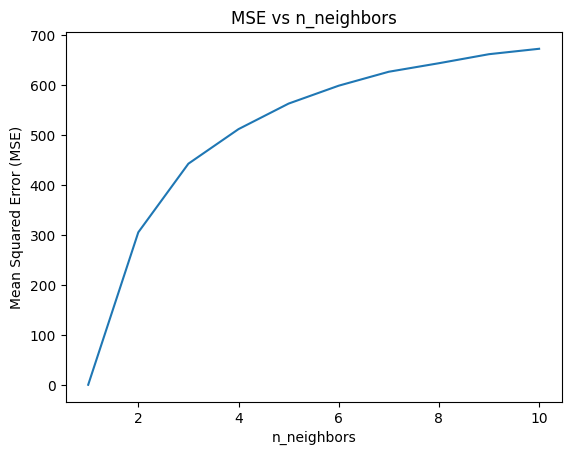

Giá trị tốt nhất cho n_neighbors là: 1
Các giá trị MSE đã được lưu vào tệp mse_values.csv


In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import statistics

# Tính toán MSE (Mean Squared Error)
mse = mean_squared_error(y_test_predict, y_pred_predict)
print(
    f"Mean Squared Error (MSE) trên dữ liệu khi Chọn số láng giềng ban đầu là 5: {mse}")

# Tìm giá trị tốt nhất cho n_neighbors (thử từ 1 đến 10 và tìm MSE nhỏ nhất)
mse_values = []
for n in range(1, 11):  # Thử n_neighbors từ 1 đến 10
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(x_test_predict, y_test_predict)
    y_pred_predict = knn.predict(x_test_predict)
    mse_values.append(mean_squared_error(y_test_predict, y_pred_predict))
print(f"Mean Squared Error (MSE) trên dữ liệu test: {
      statistics.mean(mse_values)}")

# Vẽ biểu đồ MSE theo n_neighbors
plt.plot(range(1, 11), mse_values)
plt.xlabel('n_neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs n_neighbors')
plt.show()

# In ra giá trị n_neighbors có MSE thấp nhất
best_n_neighbors_found = mse_values.index(min(mse_values)) + 1
print(f"Giá trị tốt nhất cho n_neighbors là: {best_n_neighbors_found}")

# Lưu các giá trị MSE vào tệp CSV mới
mse_df = pd.DataFrame({
    'n_neighbors': range(1, 11),
    'MSE': mse_values
})

# Lưu DataFrame vào file CSV
mse_df.to_csv(
    'D:\\Learn\\MSE23-PPR501\\Assignment2\\Work\\2B\\mse_values.csv', index=False)
print("Các giá trị MSE đã được lưu vào tệp mse_values.csv")


Dựa trên biểu đồ, ta có thể thấy rằng:

1. Khi số lượng hàng xóm (n_neighbors) tăng lên, thì Mean Squared Error (MSE) cũng tăng theo.
2. Giá trị tối ưu của n_neighbors là 1, tại đây MSE đạt giá trị thấp nhất.
   Vì vậy, kết luận rằng khi sử dụng thuật toán với n_neighbors = 1, ta sẽ đạt được kết quả tốt nhất, với MSE thấp nhất.
